In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv("CardioGoodFitness.csv")
df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,TM798,40,Male,21,Single,6,5,83416,200
176,TM798,42,Male,18,Single,5,4,89641,200
177,TM798,45,Male,16,Single,5,5,90886,160
178,TM798,47,Male,18,Partnered,4,5,104581,120


In [3]:
print(df.head())

  Product  Age  Gender  Education MaritalStatus  Usage  Fitness  Income  Miles
0   TM195   18    Male         14        Single      3        4   29562    112
1   TM195   19    Male         15        Single      2        3   31836     75
2   TM195   19  Female         14     Partnered      4        3   30699     66
3   TM195   19    Male         12        Single      3        3   32973     85
4   TM195   20    Male         13     Partnered      4        2   35247     47


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB
None


In [5]:
print(df.describe())

              Age   Education       Usage     Fitness         Income  \
count  180.000000  180.000000  180.000000  180.000000     180.000000   
mean    28.788889   15.572222    3.455556    3.311111   53719.577778   
std      6.943498    1.617055    1.084797    0.958869   16506.684226   
min     18.000000   12.000000    2.000000    1.000000   29562.000000   
25%     24.000000   14.000000    3.000000    3.000000   44058.750000   
50%     26.000000   16.000000    3.000000    3.000000   50596.500000   
75%     33.000000   16.000000    4.000000    4.000000   58668.000000   
max     50.000000   21.000000    7.000000    5.000000  104581.000000   

            Miles  
count  180.000000  
mean   103.194444  
std     51.863605  
min     21.000000  
25%     66.000000  
50%     94.000000  
75%    114.750000  
max    360.000000  


In [6]:
print(df.isnull().sum())

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64


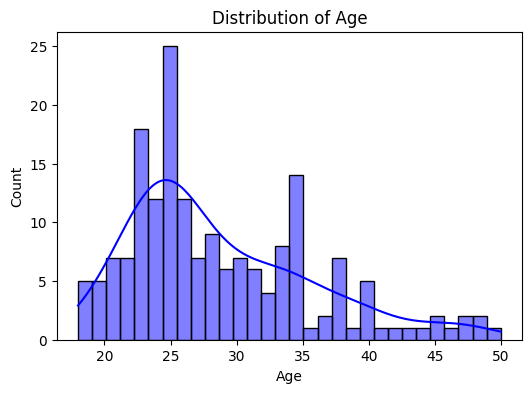

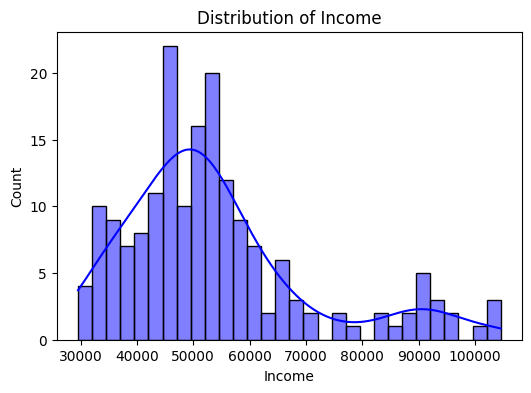

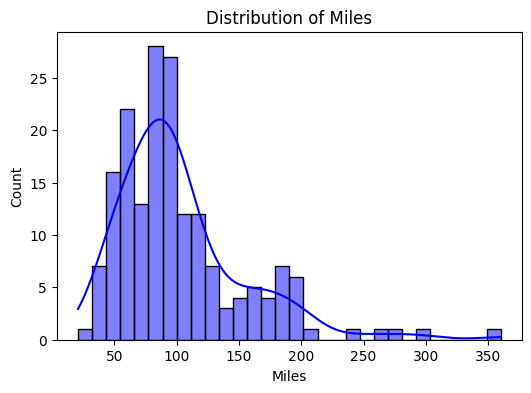

In [7]:
numerical_cols = ['Age', 'Income', 'Miles']
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, bins=30, color='blue')
    plt.title(f"Distribution of {col}")
    plt.show()

C:\Users\MR DESSENT\AppData\Local\Temp\ipykernel_21396\277583320.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette='Set2')


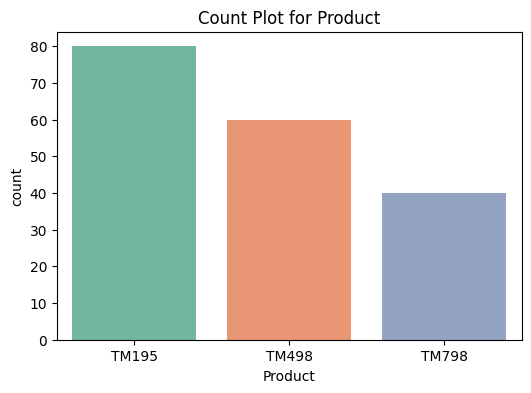

C:\Users\MR DESSENT\AppData\Local\Temp\ipykernel_21396\277583320.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette='Set2')


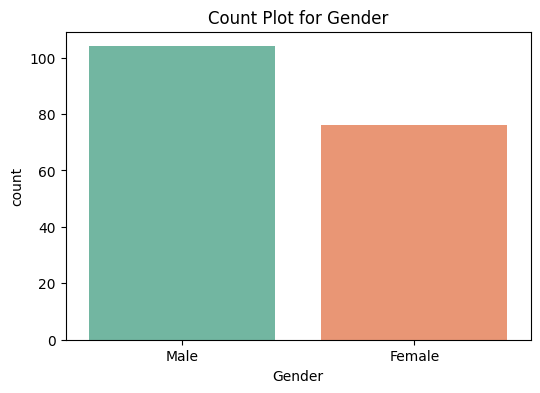

C:\Users\MR DESSENT\AppData\Local\Temp\ipykernel_21396\277583320.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette='Set2')


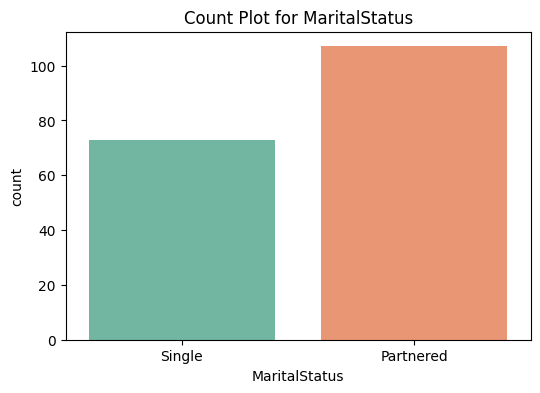

In [8]:
categorical_cols = ['Product', 'Gender', 'MaritalStatus']
for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=df[col], palette='Set2')
    plt.title(f"Count Plot for {col}")
    plt.show()

In [9]:
lab=LabelEncoder()
df['Product']=lab.fit_transform(df['Product'])
df['Gender']=lab.fit_transform(df['Gender'])
df['MaritalStatus']=lab.fit_transform(df['MaritalStatus'])

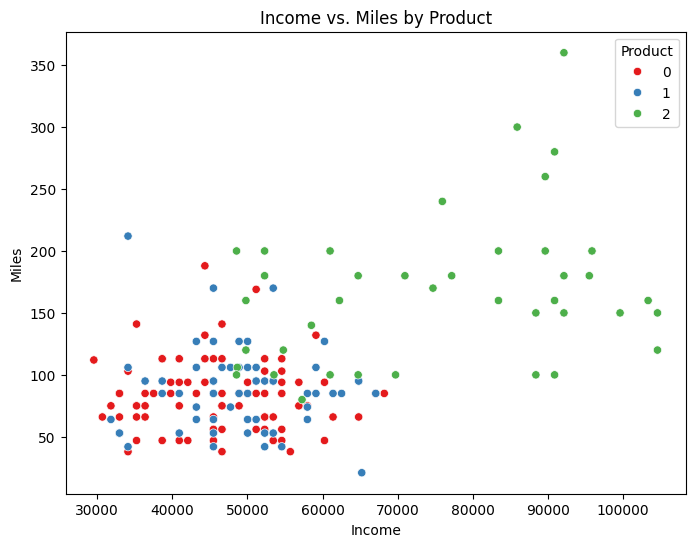

In [10]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Income'], y=df['Miles'], hue=df['Product'], palette='Set1')
plt.title("Income vs. Miles by Product")
plt.show()

C:\Users\MR DESSENT\AppData\Local\Temp\ipykernel_21396\563181996.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Product', y='Income', data=df, palette='Pastel1')


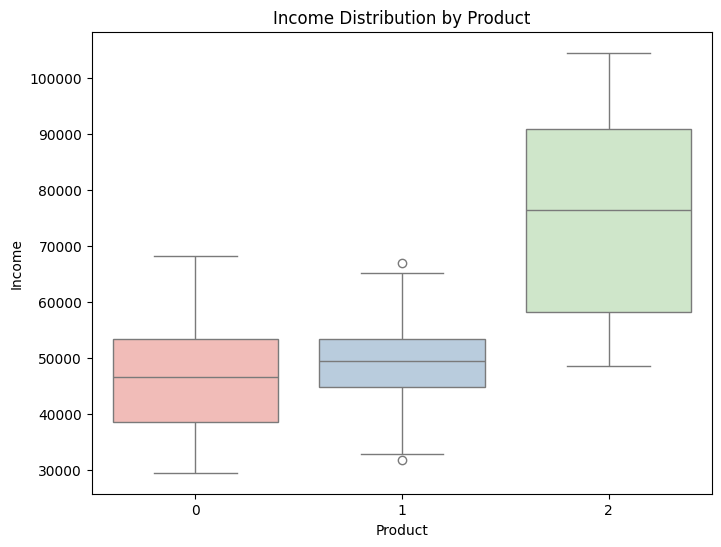

In [11]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Product', y='Income', data=df, palette='Pastel1')
plt.title("Income Distribution by Product")
plt.show()

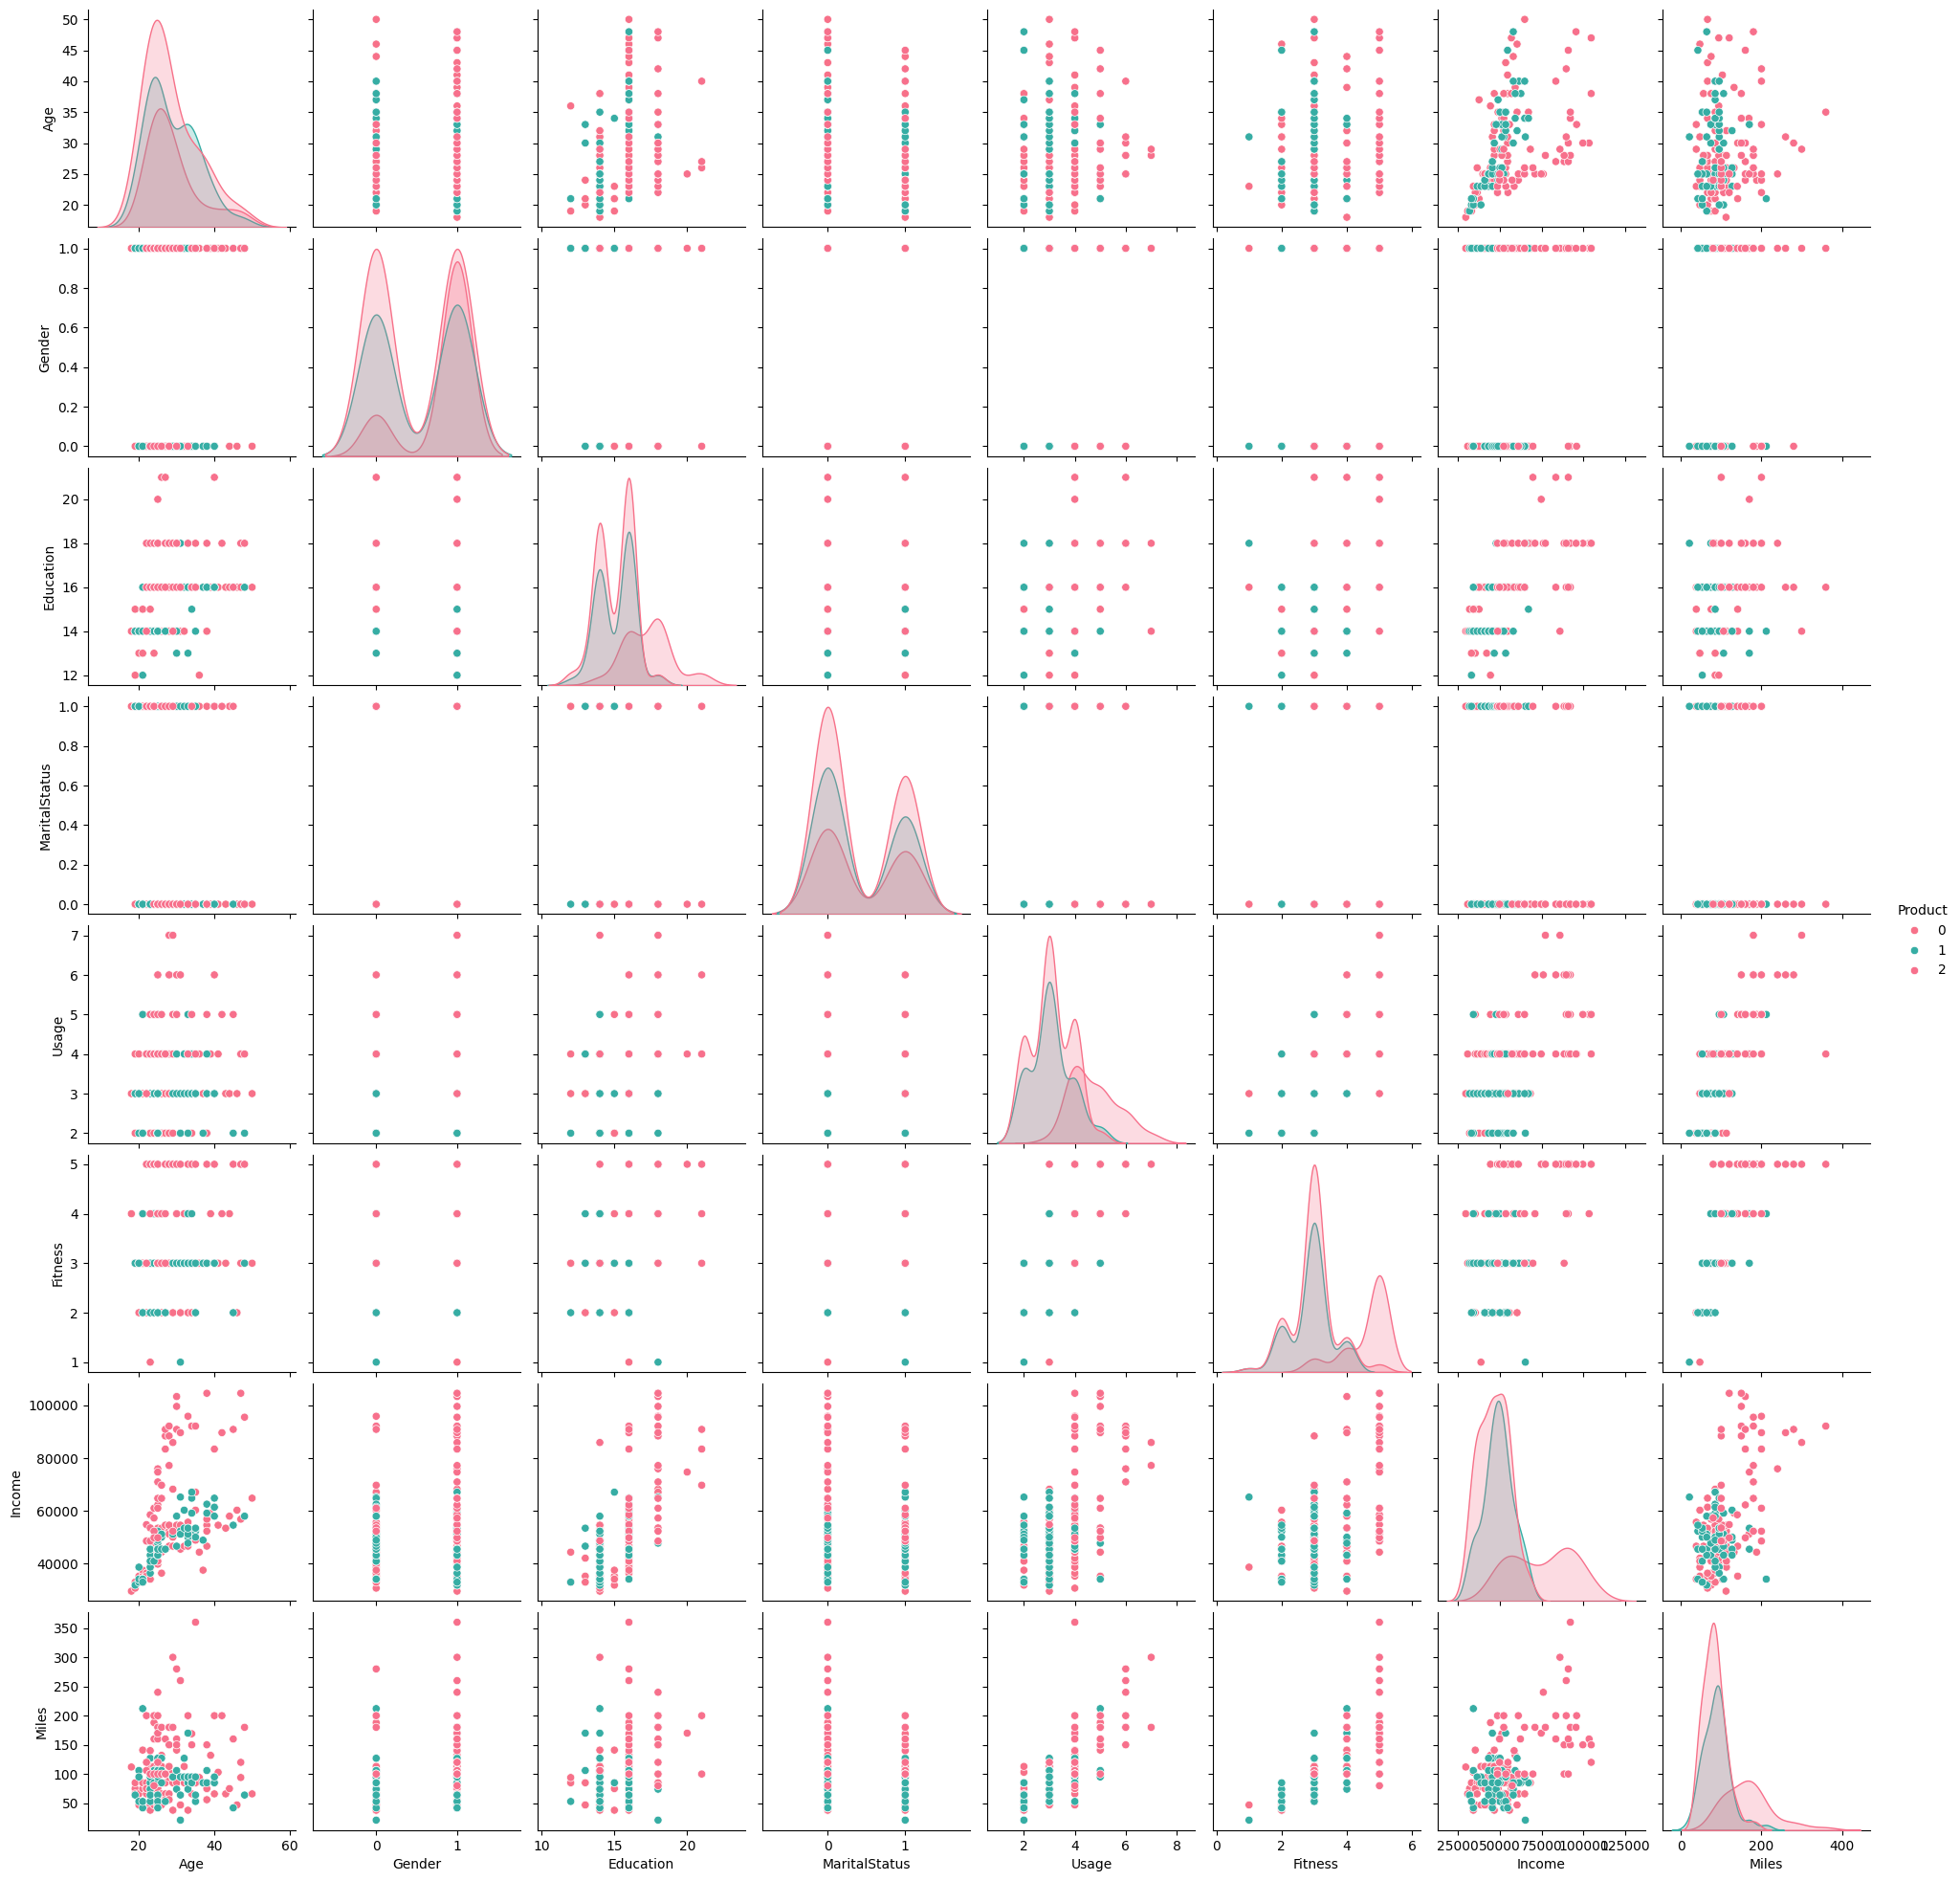

In [12]:
sns.pairplot(df, hue='Product', diag_kind='kde', palette='husl')
plt.show()

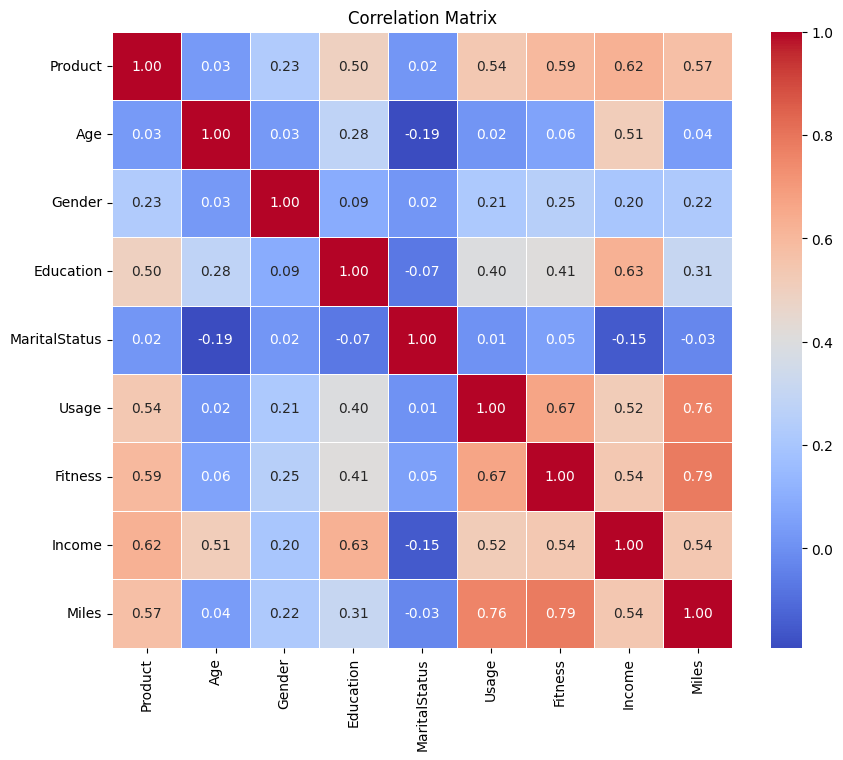

In [13]:
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

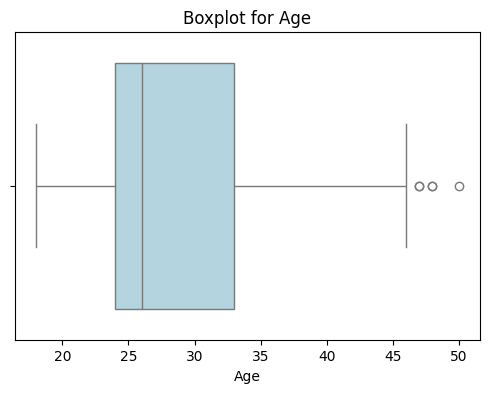

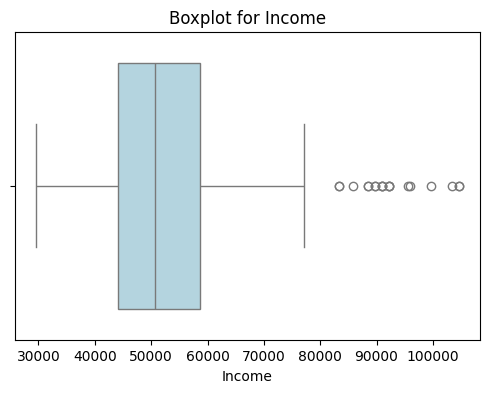

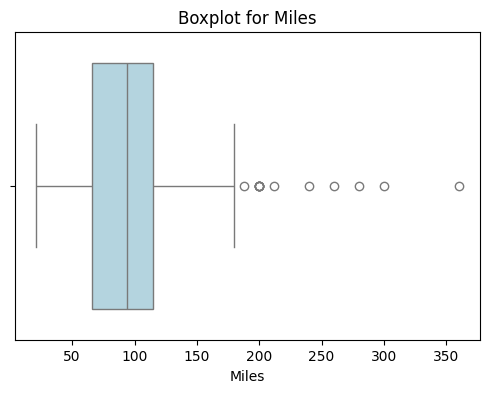

In [14]:
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col], color='lightblue')
    plt.title(f"Boxplot for {col}")
    plt.show()

In [15]:
df['Miles_per_Dollar'] = df['Miles'] / df['Income']

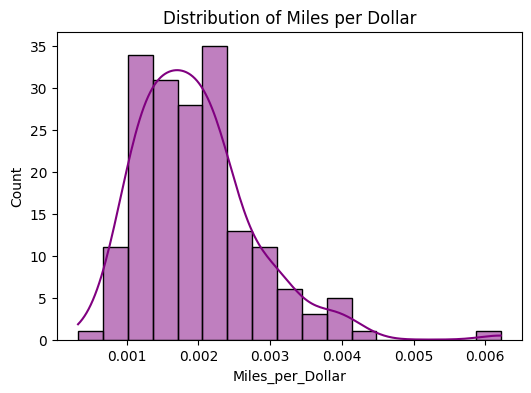

In [16]:
plt.figure(figsize=(6, 4))
sns.histplot(df['Miles_per_Dollar'], kde=True, color='purple')
plt.title("Distribution of Miles per Dollar")
plt.show()